# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [4]:
orders = pd.read_csv('./Datasets/instacart_orders.csv', sep=";")
products = pd.read_csv('./Datasets/products.csv', sep=";")
aisles = pd.read_csv('aisles.csv', sep=";")
departments = pd.read_csv('./Datasets/departments.csv', sep=";")
order_products = pd.read_csv('./Datasets/order_products.csv', sep=";")
# leer conjuntos de datos en los DataFrames

In [5]:
print(orders.info())
print(orders.head())
print(orders.describe(include="all"))# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [6]:
print(products.info())
print(products.head())
print(products.describe(include="all"))
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             1

In [7]:
aisles.info()
print(aisles.head())
print(aisles.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
          aisle_id                  aisle
count   134.000000                    134
unique         NaN                    134
top            NaN  prepared soups salads
freq           NaN                      1
mean     67.500000                    NaN
std      38.826537                    NaN
min       1.000000                    NaN
25%      34.250000                    NaN
50%      67.500000                    NaN
75%     100.750000                

In [8]:
departments.info()
print(departments.head())
print(departments.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        21.000000


In [9]:
order_products.info()
print(order_products.head())
print(order_products.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
se utiliza el metodo info() para proporcionar un resumen que nos da las columnas, los indices, tipo de datos etc
se utiliza el metodo head() para imprimir los encabezados generales y las primeras 5 filas 
se utiliza el metodo describe() nos muestra los datos estadisticos 

como ejemplo en departments al imprimir info() existen 21 filas y solo una columnas, debio a que esta es una separacion distinta y usamos el metodo sep=";" los datos correctos en primera instancia serian 21 filas y dos columnas (department_id y department) las cuales no tiene valores nulos, la columna department continen el nombre de cada departamento, para este caso y con los datos estadisticos podriamos decir que es correcta la infomracion, sin embargo hay archivos no se pueden obtener conclusiones claras  ya que existen valores ausentes/nulos que tendremos que limpiar por ejemplo en  en products la columna product_name tiene valores ausentes

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
para obtener informacion de todas las clumnas debemos usar describe(inlcude"all") esto ya lo hemos echo, debemos verificar los valres unicos, para encontrar valores ausentes de una forma mas especifica usamos insa() o isnull() rellenar los valores ausentes con fillna(value="") y si hay duplicados utilizaremos el metodo duplicated()


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [10]:
# Revisa si hay pedidos duplicados
duplicates = orders[orders.duplicated()]
print(duplicates)
#Calcula el número de filas duplicadas
num_duplicates = duplicates.shape[0]
print(num_duplicates)
#eliminar valores duplicados
orders.dropna(inplace=True)
#identificamos los valores ausentes
valores_ausentes=orders.isnull()
print(valores_ausentes)
#especificar los valores ausentes
sum_missing_values=orders.isnull().sum()
print(sum_missing_values)
#rellenar los valores ausentes
orders['days_since_prior_order'].fillna(value="", inplace=True)
print(order_days_since_prior_order)
orders.info()


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

NameError: name 'order_days_since_prior_order' is not defined

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Existen 15 lineas duplicadas y en todas las columnas se duplican valores, en la columna days_since_prior_order existen 28819 valores ausentes los cuales se vamos a  rellenar fillna(value="")

In [ ]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
#el metodo map me agregra una nueva columna para identificar los dias 
days= {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
orders['day'] = orders['order_dow'].map(days)

wednesday = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(wednesday)

¿Qué sugiere este resultado?

para el dia Wednesday existen 114 compras en el horarios de las 2 am 

In [ ]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)


In [ ]:
# Vuelve a verificar si hay filas duplicadas
#shape dara como resultado el numero exacto de las filas restantes al quitar duplicados
num_rows = orders.shape[0]
orders.info()

In [ ]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicates_order_id = orders[orders.duplicated(["order_id"])]
print(duplicates_order_id)

orders.info()

Describe brevemente tus hallazgos y lo que hiciste con ellos

una vez realizada la limpieza ya no se encuntran valores duplicados, tampoco en los pedidos esto los eliminamos con drop, utilizamos el metodo map que agregra una nueva columna para identificar los dias con mas claridad para orders solamente teniamos vaores ausentes los cuales los rellenamos con fillna(value="") con lo cual todos lo datos ya no tienen duplicados y cuentan con la misma cantidad en non-null count

### `products` data frame

In [ ]:
# Verifica si hay filas totalmente duplicadas
products['product_name'] = products['product_name'].str.upper()
duplicates = products[products.duplicated()]
print(duplicates)
print(products.isna())

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
       product_id  product_name  aisle_id  department_id
0           False         False     False          False
1           False         False     False          False
2           False         False     False          False
3           False         False     False          False
4           False         False     False          False
...           ...           ...       ...            ...
49689       False         False     False          False
49690       False         False     False          False
49691       False         False     False          False
49692       False         False     False          False
49693       False         False     False          False

[49694 rows x 4 columns]


In [ ]:
# Revisa únicamente si hay ID de departamentos duplicados
#departmet arrojara true si hay duplilcado y false sino lo hay
duplicates_department = products['department_id'].duplicated()
print(duplicates_department)

0        False
1        False
2        False
3        False
4         True
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: department_id, Length: 49694, dtype: bool


In [ ]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicates_name=products["product_name"].duplicated()
print(duplicates_name)
# en primera instancia no aparecen duplicados, pero debemos convertir los nombres en mayusculas y verificamos si hay duplicados en product_name
uppers_name=products["product_name"].str.upper()
print(uppers_name)
duplicates_product_name=products["product_name"].duplicated()
print(duplicates_product_name)

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool
0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name, Length: 49694, dtype: object
0        False
1        False
2        False
3        False
4        False
         ...  


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes
valores_duplicados=products[(~products['product_name'].isna()) & products['product_name'].duplicated()]
print(valores_duplicados)
#no existen valores duplicados en productos no faltantes

       product_id                                     product_name  aisle_id  \
2058         2059                                  BIOTIN 1000 MCG        47   
5455         5456                 GREEN TEA WITH GINSENG AND HONEY        96   
5558         5559                           CREAM OF MUSHROOM SOUP        69   
7558         7559                        CINNAMON ROLLS WITH ICING       105   
9037         9038                           AMERICAN CHEESE SLICES        21   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
2058            

### `departments` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
duplicates=departments.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool


In [ ]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicates_products=departments.duplicated(["department_id"])
print(duplicates_products)
#no hay duplicados tampoco en esta columna

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.

no existen duplicados es ninguna de las columnas, para un data frame pequeño era solo necesario identificar si habia valores duplicados, pero para rectificar comprobamos en la comlumna "department_id" 

### `aisles` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
duplicates_aisles=aisles.duplicated()
print(duplicates_aisles)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


In [ ]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicates_products=aisles.duplicated(["aisle_id"])
print(duplicates_products)

0      False
1      False
2      False
3      False
4      False
       ...  
129    False
130    False
131    False
132    False
133    False
Length: 134, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
el data frame de asiles no presenta duplicados mediante el metodo duplicated(), se comprueba tambien que no haya duplicados en la columna "aisle_id"

### `order_products` data frame

In [ ]:
# Revisa si hay filas totalmente duplicadas
duplicates_order_products=order_products.duplicated()
print(duplicates_order_products)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002    False
4545003    False
4545004    False
4545005    False
4545006    False
Length: 4545007, dtype: bool


In [ ]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicates_order_id=order_products.duplicated(["order_id"])
print(duplicates_order_id)
order_products_unique = order_products.drop_duplicates(["order_id"])
print(order_products_unique)
#volvemos a verificar
verification=order_products_unique.duplicated(['order_id'])
print(verification)

0          False
1          False
2          False
3          False
4          False
           ...  
4545002     True
4545003     True
4545004     True
4545005     True
4545006     True
Length: 4545007, dtype: bool
         order_id  product_id  add_to_cart_order  reordered
0         2141543       11440               17.0          0
1          567889        1560                1.0          1
2         2261212       26683                1.0          1
3          491251        8670               35.0          1
4         2571142        1940                5.0          1
...           ...         ...                ...        ...
4543424   1790509       43739                1.0          1
4543722   1274005       38275                1.0          1
4543749    812418       46149                1.0          1
4544396   2666881         196                1.0          1
4544839   1461911       33198                1.0          1

[450046 rows x 4 columns]
0          False
1          False
2  

Describe brevemente tus hallazgos y lo que hiciste con ellos.
al usar el metodo duplicated()  este nos arroja False y da a entender que no hay duplicados a pesar de esto verificamos el numero de ordenes para saber si esto es verdadero, sin embargo encontramos que existen duplicados en el numero de ordenes por lo cual procedemos a eliminarlos y  verificarmos nuevamentes

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [ ]:
# Encuentra los valores ausentes en la columna 'product_name'
#revisamos la informacion
products.info()
#buscamos los valores ausentes
valores_ausentes=products.isnull()
print(valores_ausentes)
sum_value_absent=products.isnull().sum()
print(sum_value_absent)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
       product_id  product_name  aisle_id  department_id
0           False         False     False          False
1           False         False     False          False
2           False         False     False          False
3           False         False     False          False
4           False         False     False          False
...           ...           ...       ...            ...
49689       False         False     False          False
49690       False         False     False          False
49691       False         False     False          False
49692       Fa

Describe brevemente cuáles son tus hallazgos.
escontramos que existe 1258 filas que tienen valores ausentes en la columna "product_name"

In [ ]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
ausentes=products.loc[products['product_name'].isnull() & (products['aisle_id'] == 100)]
print(ausentes)
#para verificar que todos los nombres de los productos estan en el pasillo ID 100
todos_ausentesid100 = ausentes == sum_value_absent['product_name']
print(todos_ausentesid100)


       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
       product_id  product_name  aisle_id  department_id
37          False         False     False          False
71          False         False     False          False
109         False         False     False          False
296         False         False     False          False
416         False 

Describe brevemente cuáles son tus hallazgos.
al buscar la columna "pruducts_name" con el metodo loc encontramos que existen valores ausentes en el pasillo id 100 sin embargo al verificar si solos valores asuentes solo se encontraban en id 100 el resultado demuestra FALSE, esto significa que no todos los valores ausentes se encuentran en el pasillo id 100

In [ ]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
ausentes=products.loc[products['product_name'].isnull() & (products['department_id'] == 21)]
print(ausentes)
dept_21 = len(ausentes)
todos_ausentes_21 = dept_21 == sum_value_absent['product_name']
print(todos_ausentes_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
True


Describe brevemente cuáles son tus hallazgos.

Al hacer la comparacion entre la columna products_anem y deparments_id encontramos que existen valores ausentes al usar el metodo "len" para encontrar cuales son las filas que encontramos con los criterrios requeridos a primera vista podriamos decir que si hay una relacion entre esto, para comproba que esto es verdad realizamos una igualacion == y el resultado al imprimir Tru significa que todos los nombres de productos ausentes están específicamente asociados con el departamento con ID 21

In [ ]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = products.loc[products['aisle_id'] == 100]

# Filtrar la tabla department para obtener información del departamento con ID 21
dept_21 = products.loc[products['department_id'] == 21]

print(aisle_100)
print(dept_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]
       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417      

Describe brevemente cuáles son tus hallazgos.
existe 1258 falas con valores ausentes entra la relacion de las columnas asile_id y deparment_id

In [ ]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna(value="Unknown", inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
para rellenar las filas con valores ausentes se utilizao el metdo fillna(value="Unknow" segui do inplcae=True para que reemplzara sobre el archvio original y al imprimir products.info() podemos observa que ya no existen valores ausentes y todas las columnas cuentas con un total de 49694 filas


### `orders` data frame

In [ ]:
# Encuentra los valores ausentes
#revisamos la informacion
orders.info()
#buscamos los valores ausentes
valores_ausentes_orders=orders.isnull()
print(valores_ausentes_orders)
ausentes=orders.isnull().sum()
print(ausentes)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450148 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                450148 non-null  int64  
 1   user_id                 450148 non-null  int64  
 2   order_number            450148 non-null  int64  
 3   order_dow               450148 non-null  int64  
 4   order_hour_of_day       450148 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 24.0 MB
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0          False    False         False      False              False   
1          False    False         False      False              False   
2          False    False         False      False              False   
3          False    False         False      False              False   
4          False    False         False   

In [ ]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_values = orders[orders['days_since_prior_order'].isnull()]
first_missing = missing_values[missing_values['order_number'] > 1]['order_id'].count()
print(first_missing)

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
al imprimir la suma de los valores ausentes no se encontro ninguno, como queremos saber si existe algun valos ausente que no sea el primer pedido tomamos como referencia la columna days_since_prior_order ya que esta indica los ultimos pedidos utilizamos el ">1" para saber si hay mas de una orden con ese numero de pedido al encontrar que no existe esto y arrjarnos 0 deducimos que no existe NAN 

### `order_products` data frame

In [ ]:
# Encuentra los valores ausentes
order_products.info()
missing_value_order_products=order_products.isnull()
print(missing_value_order_products)
sum_order_products=order_products.isnull().sum()
print(sum_order_products)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
         order_id  product_id  add_to_cart_order  reordered
0           False       False              False      False
1           False       False              False      False
2           False       False              False      False
3           False       False              False      False
4           False       False              False      False
...           ...         ...                ...        ...
4545002     False       False              False      False
4545003     False       False              False      False
4545004     False       False              False      False
4545005     False       False              F

In [ ]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
sum_order_products=order_products.isnull().sum()
order_products.drop_duplicates(inplace=True)
print(sum_order_products)
min_value = order_products['add_to_cart_order'].min()
max_value = order_products['add_to_cart_order'].max()
print(min_value)
print(max_value)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
1.0
64.0


Describe brevemente cuáles son tus hallazgos.
el valor minimo indica que la orden uno fue la menos pedida y la maxima, la orden mas alta

In [ ]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
save_orders = order_products.loc[order_products['add_to_cart_order'].isnull(), 'order_id']
print(save_orders)
save_orders = save_orders.tolist()
print(save_orders)


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64
[2449164, 1968313, 2926893, 1717990, 1959075, 844733, 61355, 936852, 264710, 1717990, 1564093, 129627, 264710, 293169, 2849370, 1386261, 3308010, 903110, 2136777, 3347453, 1888628, 165801, 2449164, 2094761, 3347453, 1038146, 2136777, 2997021, 844733, 844733, 2136777, 813364, 165801, 2256933, 171934, 264710, 2449164, 2409109, 3347453, 813364, 2926893, 936852, 1730767, 1169835, 733526, 844733, 293169, 61355, 903110, 1968313, 733526, 2136777, 2926893, 404157, 1386261, 171934, 3125735, 747668, 3308010, 1169835, 1800005, 1961723, 936852, 2849370, 3308010, 61355, 871281, 1717990, 813364, 388234, 61355, 3125735, 1959075, 61355, 3125735, 1648217, 171934, 3125735, 61355, 1477139, 1959075, 1717990, 1717990, 61355, 1717990, 171934, 1038146, 3308010, 

In [ ]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_values = order_products.loc[order_products['add_to_cart_order'].isnull()]
order_counts = missing_values.groupby('order_id')['product_id'].count()
all_orders= (order_counts > 64).all()
print(all_orders)
grouped_orders_with_missing = missing_values.groupby('order_id').size()
print(grouped_orders_with_missing)
min_product_count = order_counts.min()
print(min_product_count)

False
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64
1


Describe brevemente cuáles son tus hallazgos.
existen valores ausentes con pedidos que tienen mas de 64 productos

In [ ]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
print(order_products['add_to_cart_order'].dtype)

int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
usamos fillna() para reemplazar los valores asuentes por 99 y inplace=True para que el reemplazo lo realize en el archivo original, usamos astype para convertir los valores a int (enteros)

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

ya que verificamos los tipos de datos que tenemos  y realizamos la limpieza de los datos (quitamos duplicados y valores ausentes) ya podemos trabajar correctamente con los datos y hacer graficos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
valid_hour_range = orders['order_hour_of_day'].between(0, 23).all()
valid_dow_range = orders['order_dow'].between(0, 6).all()

In [ ]:
print(valid_hour_range)
print(valid_dow_range)

True
True


Escribe aquí tus conclusiones
ya que ambos resultados son True, significa que todos los valores en esas columnas están dentro de los rangos esperados

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

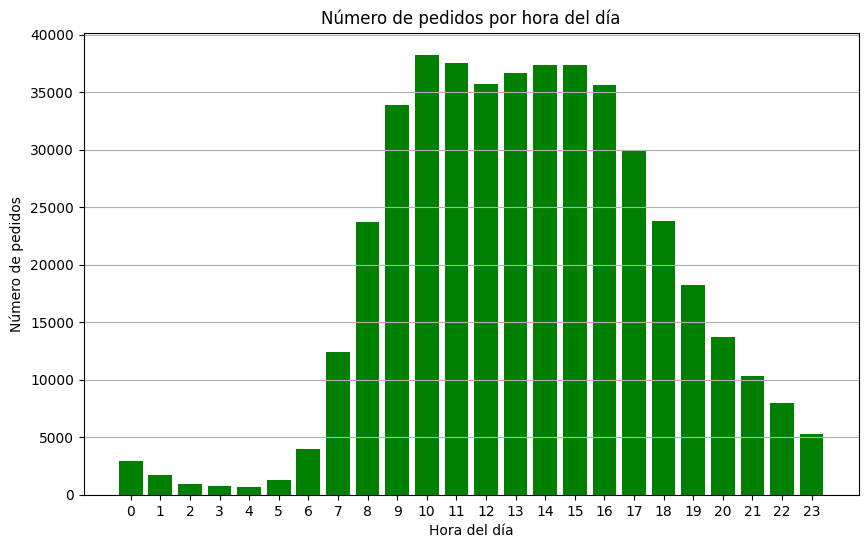

In [ ]:
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(orders_per_hour.index, orders_per_hour.values, color='green')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por hora del día')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones
El grafico muestra el número de pedidos durante las 24 hrs del dia donde el mayor numero de pedidios es entre las 10 am y las 16 pm



### [A3] ¿Qué día de la semana compran víveres las personas?

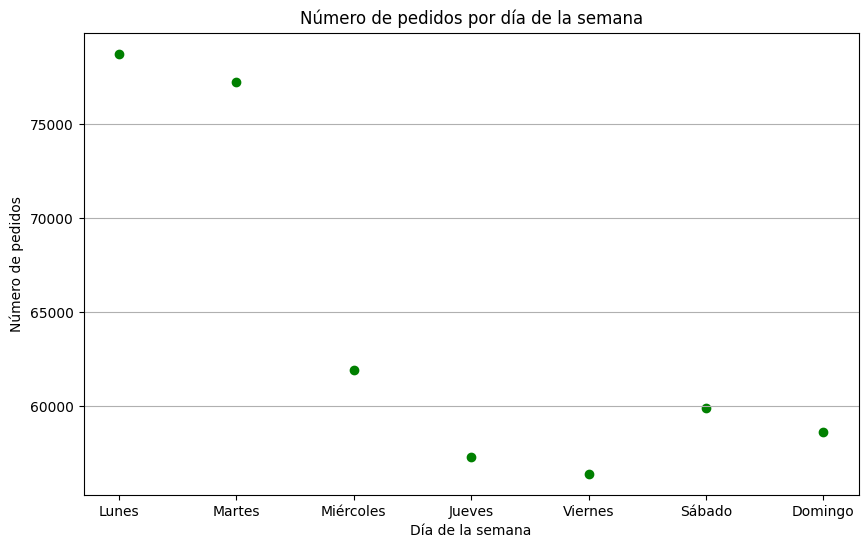

In [ ]:
orders_per_dow = orders['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.scatter(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], orders_per_dow.values, color='green')

plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.title('Número de pedidos por día de la semana')
plt.grid(axis='y')
plt.show()


Escribe aquí tus conclusiones

se usa una grafica tipo scatter para que se vea una tendencia mas clara para los dias mas altos y bajos por ordenes de pedidios el dia que mas se consume son los lunes, realizandose mas de 75 mil pedidos y los dias vienes es el dia que menos de consume con menos de 60 mil numero de ordenes

el numero de personas esta entre menos de 500 hasta mas del 30 mil, en el horario de de 11 a las 17 horas es el mas concurrido por una gran cantidad de ordenes por persona de es mayor o igual a los 30 mil 

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

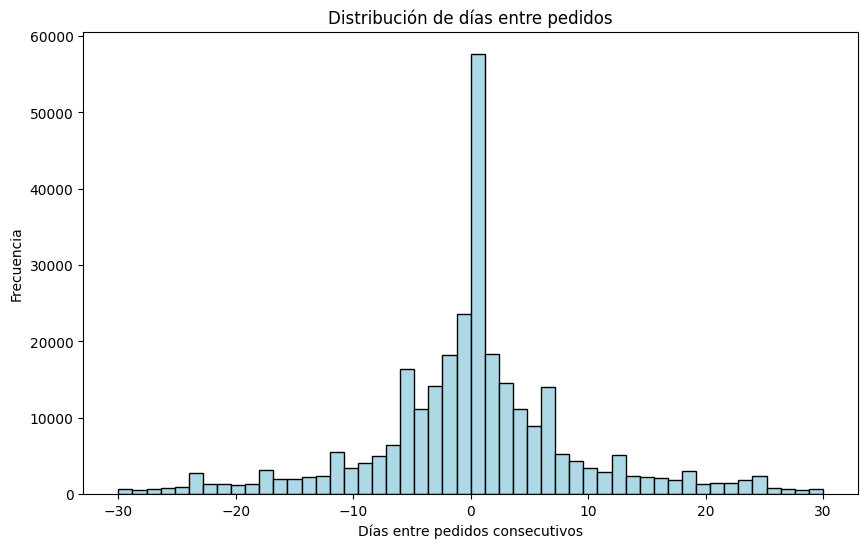

Mínimo días entre pedidos: -30.0
Máximo días entre pedidos: 30.0


In [ ]:
orders.sort_values(['user_id', 'order_number'], inplace=True)
orders['days_between_orders'] = orders.groupby('user_id')['days_since_prior_order'].diff()

# Elimina los valores nulos resultantes de la diferencia
orders['days_between_orders'].dropna(inplace=True)

# Grafica el histograma
plt.figure(figsize=(10, 6))
plt.hist(orders['days_between_orders'], bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución de días entre pedidos')
plt.xlabel('Días entre pedidos consecutivos')
plt.ylabel('Frecuencia')
plt.show()

# Imprime los valores mínimo y máximo de días entre pedidos para referencia
min_time = orders['days_between_orders'].min()
max_time = orders['days_between_orders'].max()
print(f'Mínimo días entre pedidos: {min_time}')
print(f'Máximo días entre pedidos: {max_time}')

Escribe aquí tus conclusiones
el numero de personas esta entre menos de 500 hasta mas del 30 mil, en el horario de de 11 a las 17 horas es el mas concurrido por una gran cantidad de ordenes por persona de es mayor o igual a los 30 mil 
al obtener los valores mínimos y máximos del tiempo que las personas esperan hasta hacer otro pedido

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [ ]:
wednesday_orders = orders[orders['order_dow'] == 2]
saturday_orders = orders[orders['order_dow'] == 5]

In [ ]:
wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()


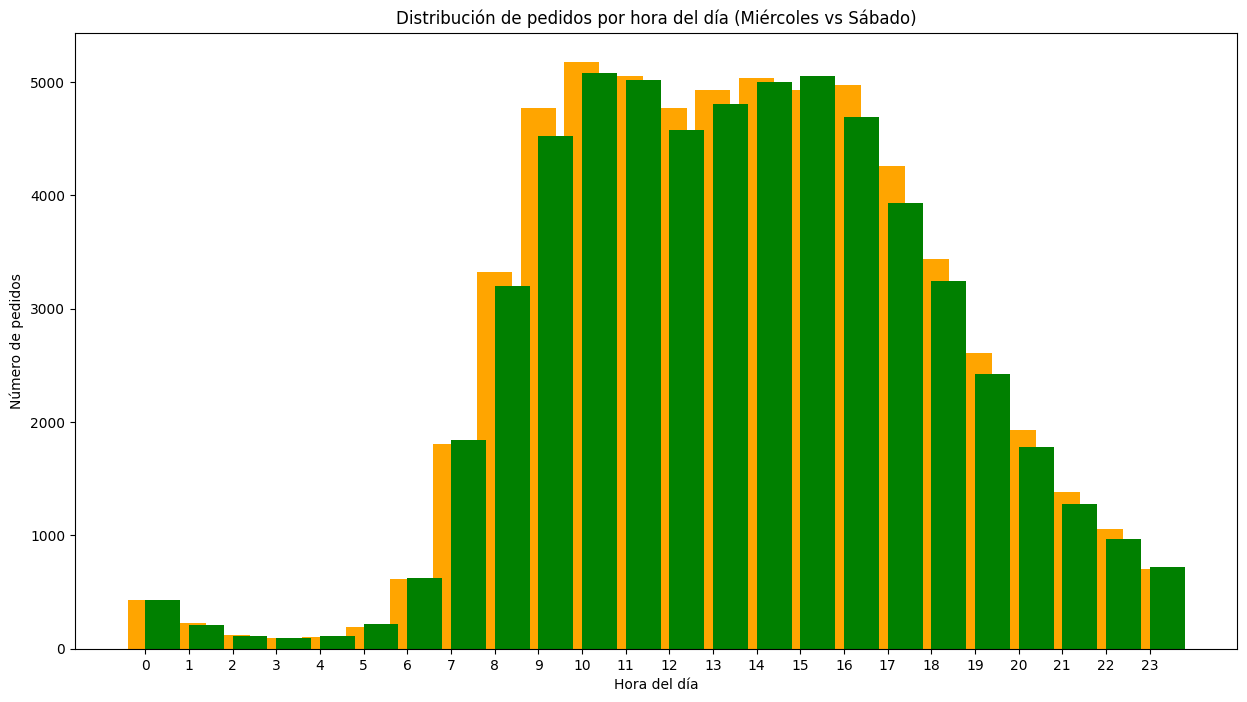

In [ ]:
plt.figure(figsize=(15, 8))
plt.bar(wednesday_hour_counts.index, wednesday_hour_counts.values, color='orange', label='Miércoles')
plt.bar(saturday_hour_counts.index + 0.4, saturday_hour_counts.values, color='green', label='Sábado')
plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.show()


Escribe aquí tus conclusiones
las graficas muestran las 24 horas con respecto al numero de pedidos que se realizan, aqui podemos observar que el dia miercoles y sabdo son dias muy parecidos en el numero de compras e incluso el horario 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [ ]:
orders_per_customer = orders.groupby('user_id')['order_id'].count()
orders_count = orders_per_customer.value_counts().sort_index()

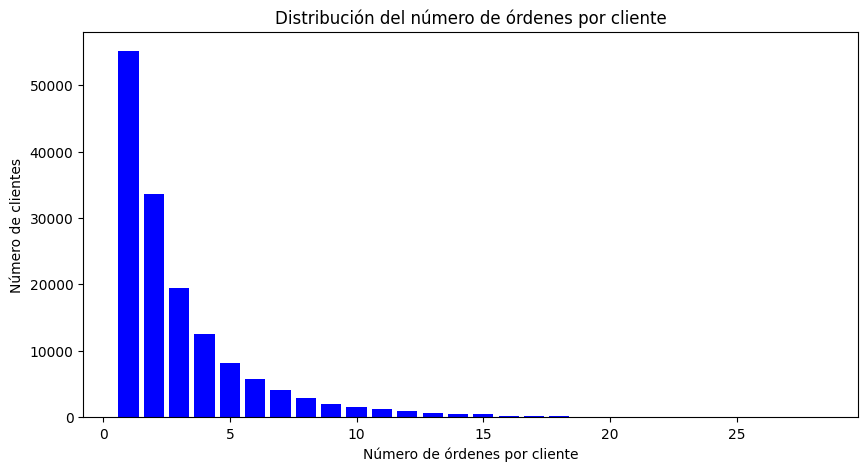

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(orders_count.index, orders_count.values, color='b')
plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes por cliente')
plt.ylabel('Número de clientes')
plt.show()

Escribe aquí tus conclusiones
existe una relacion entre el numero de ordenes con el numero de clientes donde usando la funcion sort.index nos ayuda a acomodar ascendentemente para saber cuantos clientes tiene una orden, dos ordenes etc

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [ ]:
top_products = order_products['product_id'].value_counts().head(20)
top_products_ids = top_products.index.tolist()


In [ ]:
top_products_info = products[products['product_id'].isin(top_products_ids)][['product_id', 'product_name']]
top_products_info = top_products_info.merge(top_products, left_on='product_id', right_index=True)
top_products_info = top_products_info.sort_values(by='product_id')

In [ ]:
top_products_info['ranking'] = range(1, len(top_products_info) + 1)
top_products_info = top_products_info.sort_values(by='product_id')
top_products_info.reset_index(drop=True, inplace=True)
print(top_products_info[['ranking', 'product_id', 'product_name', 'product_id_y']].rename(columns={'product_id_y': 'frequency'}))



    ranking  product_id              product_name  frequency
0         1        5876             ORGANIC LEMON      12232
1         2        8277  APPLE HONEYCRISP ORGANIC      11993
2         3       13176    BAG OF ORGANIC BANANAS      53297
3         4       16797              STRAWBERRIES      20018
4         5       21137      ORGANIC STRAWBERRIES      37039
5         6       21903      ORGANIC BABY SPINACH      33971
6         7       22935      ORGANIC YELLOW ONION      15898
7         8       24852                    BANANA      66050
8         9       24964            ORGANIC GARLIC      15292
9        10       26209                     LIMES      19690
10       11       27845        ORGANIC WHOLE MILK      19600
11       12       27966       ORGANIC RASPBERRIES      19197
12       13       28204        ORGANIC FUJI APPLE      12544
13       14       39275       ORGANIC BLUEBERRIES      13879
14       15       40706    ORGANIC GRAPE TOMATOES      11781
15       16       45007 

Escribe aquí tus conclusiones

la diferiencia entre los dias viernes y sabados no varia mucho ya que como se obervo en la grafica donde se muestra ¿que dia de la seman compran mas viveres las personas? el numero de compras es casi menos o igual a 60 mil, por lo que podemos determinar que estos datos son ciertos y no obstante son similares incluso el numero de pedido con respecto al horario al mostrar los 20 pedidos mas populares puden existir diferentes formas de comodar los datos por su ranking ya se por "product_id" que o "frequency" ya que nos da los datos con mas frecuencias se compra ese producto, para este caso lo he ordenado por "product_id" puesto que este va desde el primer cliente hasta el ultimo, sin embargo haria mas sentido con "frequency" ya es son los productos con mas frecuencia, esto dependera de los datos excatos que queremos obtener o en su caso relaizarlo de ambas formas

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
average_items_per_order = order_products.groupby('order_id')['add_to_cart_order'].max().mean()

print(average_items_per_order)

10.242555205467886


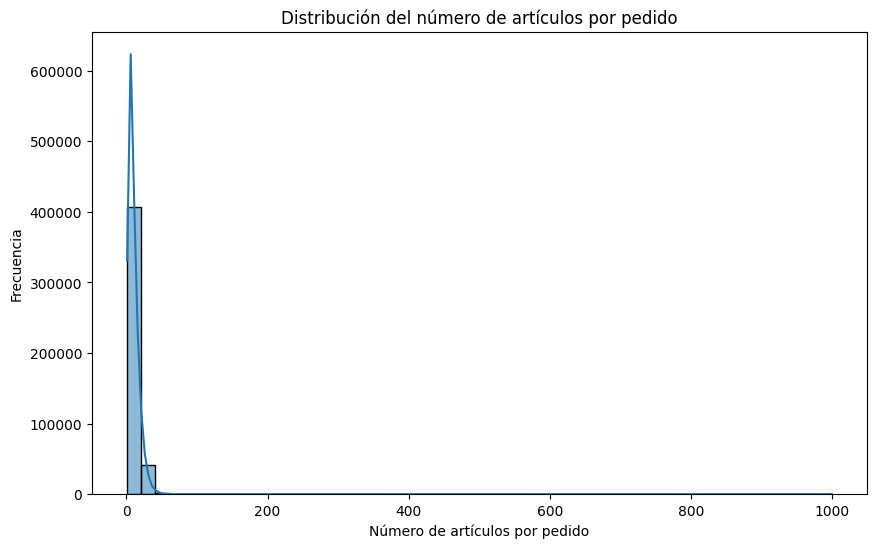

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(order_products.groupby('order_id')['add_to_cart_order'].max(), bins=50, kde=True)
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones
Las personas compran en un promedio de 10 articulos por pedido

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [ ]:
top_order_products = order_products.groupby('product_id')['reordered'].sum().reset_index()

In [ ]:
top_order_products = top_order_products.sort_values(by='reordered', ascending=False).head(20)

In [ ]:
top_order_products_info = top_order_products.merge(products, on='product_id')[['product_id', 'product_name']]

In [ ]:
print(top_order_products)


       product_id  reordered
22808       24852      55763
12025       13176      44450
19370       21137      28639
20077       21903      26233
43271       47209      23629
43788       47766      18743
25556       27845      16251
43663       47626      15044
25666       27966      14748
15364       16797      13945
24047       26209      13327
21025       22935      11145
22908       24964      10411
41244       45007      10076
45561       49683       9538
25889       28204       8989
7543         8277       8836
35996       39275       8799
5375         5876       8412
45155       49235       8389


Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [ ]:
total_orders_per_product = order_products.groupby('product_id')['order_id'].nunique()
reordered_orders_per_product = order_products.groupby('product_id')['reordered'].sum()
reorder_rate_per_product = (reordered_orders_per_product / total_orders_per_product).reset_index()

In [ ]:
reorder_rate_per_product = reorder_rate_per_product.merge(products, on='product_id', how='left')
reorder_rate_per_product = reorder_rate_per_product[['product_id', 'product_name', 'reordered']]
reorder_rate_per_product = reorder_rate_per_product.sort_values(by='reordered', ascending=False)

KeyError: "['reordered'] not in index"

In [ ]:
print(reorder_rate_per_product)

       product_id         0  \
0               1  0.564286   
1               2  0.000000   
2               3  0.738095   
3               4  0.510204   
4               7  0.500000   
...           ...       ...   
45568       49690  0.800000   
45569       49691  0.430556   
45570       49692  0.416667   
45571       49693  0.440000   
45572       49694  0.333333   

                                            product_name  aisle_id  \
0                             CHOCOLATE SANDWICH COOKIES        61   
1                                       ALL-SEASONS SALT       104   
2                   ROBUST GOLDEN UNSWEETENED OOLONG TEA        94   
3      SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...        38   
4                         PURE COCONUT WATER WITH ORANGE        98   
...                                                  ...       ...   
45568                      HIGH PERFORMANCE ENERGY DRINK        64   
45569                      ORIGINAL PANCAKE & WAFFLE MIX       130 

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [ ]:
df_merge = order_products.merge(orders)
average_reorder_proportion_per_customer = df_merge.groupby('user_id')['reordered'].mean().reset_index()
print(average_reorder_proportion_per_customer)

        user_id  reordered
0             2   0.076923
1             4   0.000000
2             5   0.666667
3             7   0.928571
4            11   0.200000
...         ...        ...
140509   206203   0.222222
140510   206206   0.714286
140511   206207   0.891304
140512   206208   0.696000
140513   206209   0.320000

[140514 rows x 2 columns]


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]
top_first_in_cart = first_in_cart['product_id'].value_counts().head(20).reset_index()
top_first_in_cart.columns = ['product_id', 'count']
top_first_in_cart = top_first_in_cart.merge(products, on='product_id')[['product_id', 'product_name', 'count']]
print(top_first_in_cart)

    product_id                 product_name  count
0        24852                       BANANA  15562
1        13176       BAG OF ORGANIC BANANAS  11026
2        27845           ORGANIC WHOLE MILK   4363
3        21137         ORGANIC STRAWBERRIES   3946
4        47209         ORGANIC HASS AVOCADO   3390
5        21903         ORGANIC BABY SPINACH   3336
6        47766              ORGANIC AVOCADO   3044
7        19660                 SPRING WATER   2336
8        16797                 STRAWBERRIES   2308
9        27966          ORGANIC RASPBERRIES   2024
10       44632   SPARKLING WATER GRAPEFRUIT   1914
11       49235          ORGANIC HALF & HALF   1797
12       47626                  LARGE LEMON   1737
13         196                         SODA   1733
14       38689     ORGANIC REDUCED FAT MILK   1397
15       26209                        LIMES   1370
16       12341                HASS AVOCADOS   1340
17        5785  ORGANIC REDUCED FAT 2% MILK   1310
18       27086                 

Escribe aquí tus conclusiones
la informacion proporciona una lista de los 20 principales artículos que las personas ponen primero en sus carritos, lo que te ayudará a entender qué productos son más comúnmente seleccionados primero por los clientes al realizar un pedido

### Conclusion general del proyecto:

una vez que realizamos la limpieza de los datos, quitamos duplicados etc. los que queremos mostrtar es el comportamiento de los clientes como en que horario compran mas, que dia suelen comprar mas productos, cuales son los productos que mas se piden (pupulares) y cuantos articulos en promedio por pedido se llegan a comprar y cuáles se reordenan con más frecuencia y qué productos se añaden primero al carrito. los demas de los dias que mas se venden que principalmente son los lunes encontra que el producto Banana y bag of organic bananas son los dos productos que mas consumen los clientes seguido en tercer luagr con organic whole milk que apartir de aqui podemos determinar que los desendentes productos que las personas ponen pirmero en sus carritos ya no es tan alta o frecuente la cantidad como los dos primeros mencionados